# UPC Quantum Engineering Final Project: Quantum Channel Discrimination

Tutor: Matteo Rosati

Students: Jesús Huerta & Albert Solana

Date: February 2021

## Introduction

Our goal consists of being able to discrimate between two-qubit amplitude damping channels.

Given an amplitude damping channel, which describes the energy loss of a system, with two attenuation degrees ($\eta_0$, $\eta_1$), we need to find the optimal input state (defined by angle $\theta_{in}$ and phase $\phi_{in}$) and output measurement (described by $\phi_{out}$ and $\theta_{out}$), so that better identifies the channel and which $\eta from the two provided is the one used.

Our project is based on the [Discriminating qubit amplitude damping channels paper](https://arxiv.org/abs/2009.01000) So, we will be checking that the results we obtain are aligned with the ones from the paper.

For this project we implement several quantum circuits, going from the most simple to more sophisticated ones that perfect the task to solve: the discrimination of the given amplitude damping channel.

As described in \[1\], an amplitude damping channel is described by the Kraus operators:
$$
E_0 =
\begin{bmatrix}
1 & 0\\
0 & \sqrt{1 - \lambda}
\end{bmatrix}
$$
$$
E_1 =
\begin{bmatrix}
0 & \sqrt{\lambda}\\
0 & 0
\end{bmatrix}
$$

And a circuit model for amplitude damping:

![amplitude damping channel](damping-channel.png "Amplitude Damping Channel")

Being $U_{\eta}$ as the following gates:

![](un-gates.png)

When we launch an execution, we define the following 6 variables to solve our optimization problem that best discriminate the channel:
- Input state: angle $\theta_{in}$ and phase $\phi_{in}$
- Channel attenuation levels: $\eta_0$ and $\eta_1$
- Output measurement: $\phi_{out}$ and $\theta_{out}$

An example circuit:

![](base-circuit.png)

Finally, for every strategy we want to test, we proceed with the following steps:

1. **Initial State Preparation**:
As we have to provide the state values to initialize the input qubit $\psi$ we have to do a conversion from angles in the sphere to statevector amplitudes. These state vectors will be the combination of $\alpha|0\rangle\,+\,\beta|1\rangle$. As default values, we generate 200 state vectors as a combination of 20 $\theta_{in}$ angles and 10 $\phi_{in}$ phases evenly distributed to fulfill the $2\pi$ rotations.

2. **Run the circuit and do the measurement**:
For every input qubit state, we set the circuit applying the passed $\eta$ as attenuation degree and $\phi_{out}$ and $\theta_{out}$ as the measurement rotations.

3. **Results Analysis**:
For each strategy, we show the following analysis:
- Impact of the amplitude damping channel attenuation comparing the input and output probabilites
- Effect of the amplitude damping channel attenuation on the Bloch sphere
- Computing the amplitude damping channel fidelity

Since all previous results are performed on an ideal noiseless quantum simulator, we also provide som **extended results**:
- Effect of the amplitude damping channel attenuation on the Bloch sphere on a real IBMQ Quantum device (only for a few points)
- Effect of the amplitude damping channel attenuation on the Bloch sphere adding a noise model to the quantum simulation


## One-shot Discrimination



In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import numpy as np
from numpy import pi
import math
from src.quantum_channel_discrimination import plot_probabilities2, run_base_circuit, plot_surface_probabilities, plot_wireframe_blochs, plot_surface_blochs, plot_fidelity

In [2]:
points_theta = 20  # Points of Theta angle (pi) in Bloch sphere - min 2
points_phase = 10  # Points of Phase angle (2*pi) in Bloch sphere - min 2
# angles shift from first parameter, to the second one, with jumps using the third parameter
# angles_eta = [0, pi/1.5]
out_rz_angle=0
out_ry_angle=0
angles_eta = np.arange(0, np.pi, 2*np.pi/(points_theta*points_phase))
initialStates, totalResults, totalCounts, totalCircuits, totalFinalStates, anglesPhase, Z_Output0, Z_Output1, X_Input0, X_Input1, Y_Eta, initialStatesReshaped, allChannelsFinalStatesReshaped, eta_degrees = run_base_circuit(angles_eta=angles_eta, points_theta=points_theta, points_phase=points_phase, iterations=2000, out_rz_angle=out_rz_angle, out_ry_angle=out_ry_angle)

Simulating channel with η = 0°
Simulating channel with η = 18°
Simulating channel with η = 36°
Simulating channel with η = 54°
Simulating channel with η = 72°
Simulating channel with η = 90°
Simulating channel with η = 108°
Simulating channel with η = 126°
Simulating channel with η = 144°
Simulating channel with η = 162°


### Initial base circuit with Input $\psi = \alpha|0\rangle\, +\, \beta|1\rangle$ with $\eta=0$, $\phi_{out}=0$ and $\theta_{out}=0$

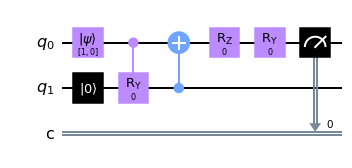

In [3]:
totalCircuits[0][0].draw('mpl')

### Impact of the amplitude damping channel attenuation comparing the input and output probabilites
#### For all 200 Input States, from $\eta=0$ to $\eta=\pi$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

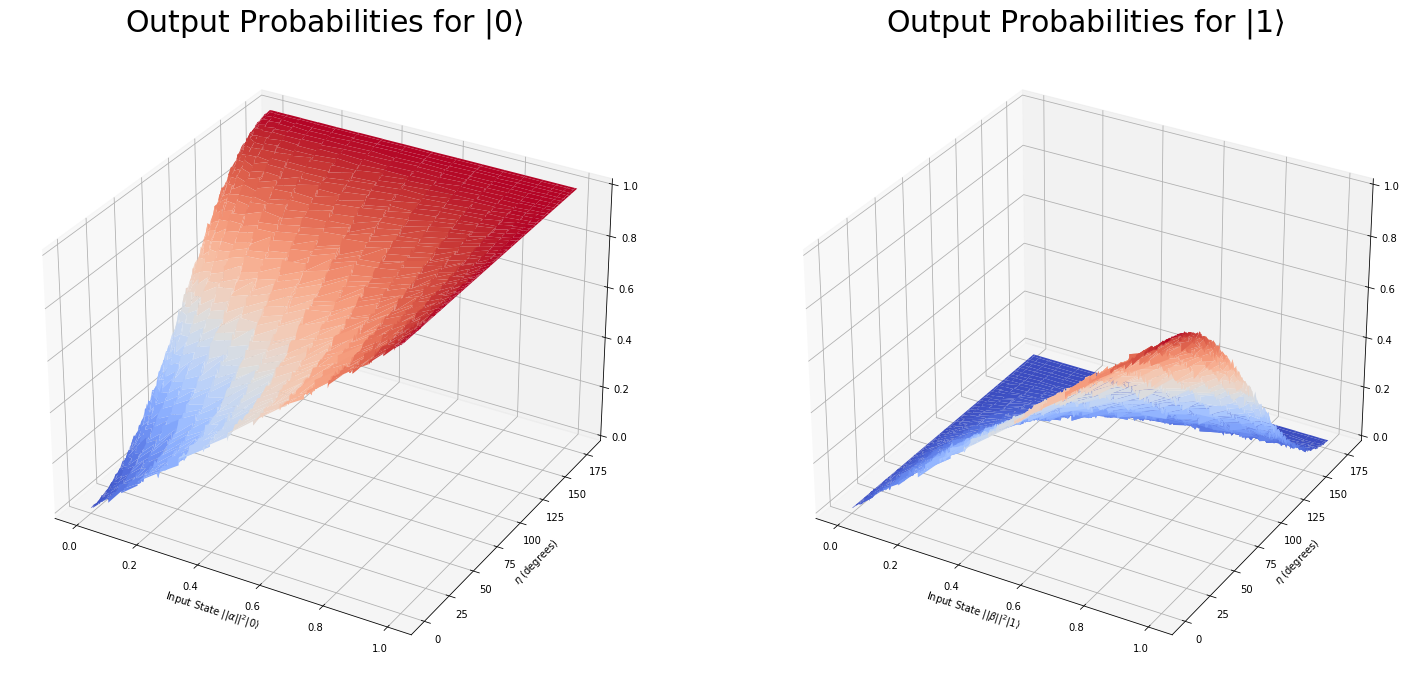

In [4]:
plot_surface_probabilities(X_Input0, X_Input1, Z_Output0, Z_Output1, eta_degrees)

![Input vs Output Probabilities](../src/img/output_probs2.png "Input vs Output Probabilities")

### Effect of the amplitude damping channel attenuation on the Bloch sphere
#### For all 200 Input States, from 8 channels $\eta=0$ to $\eta=\pi$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

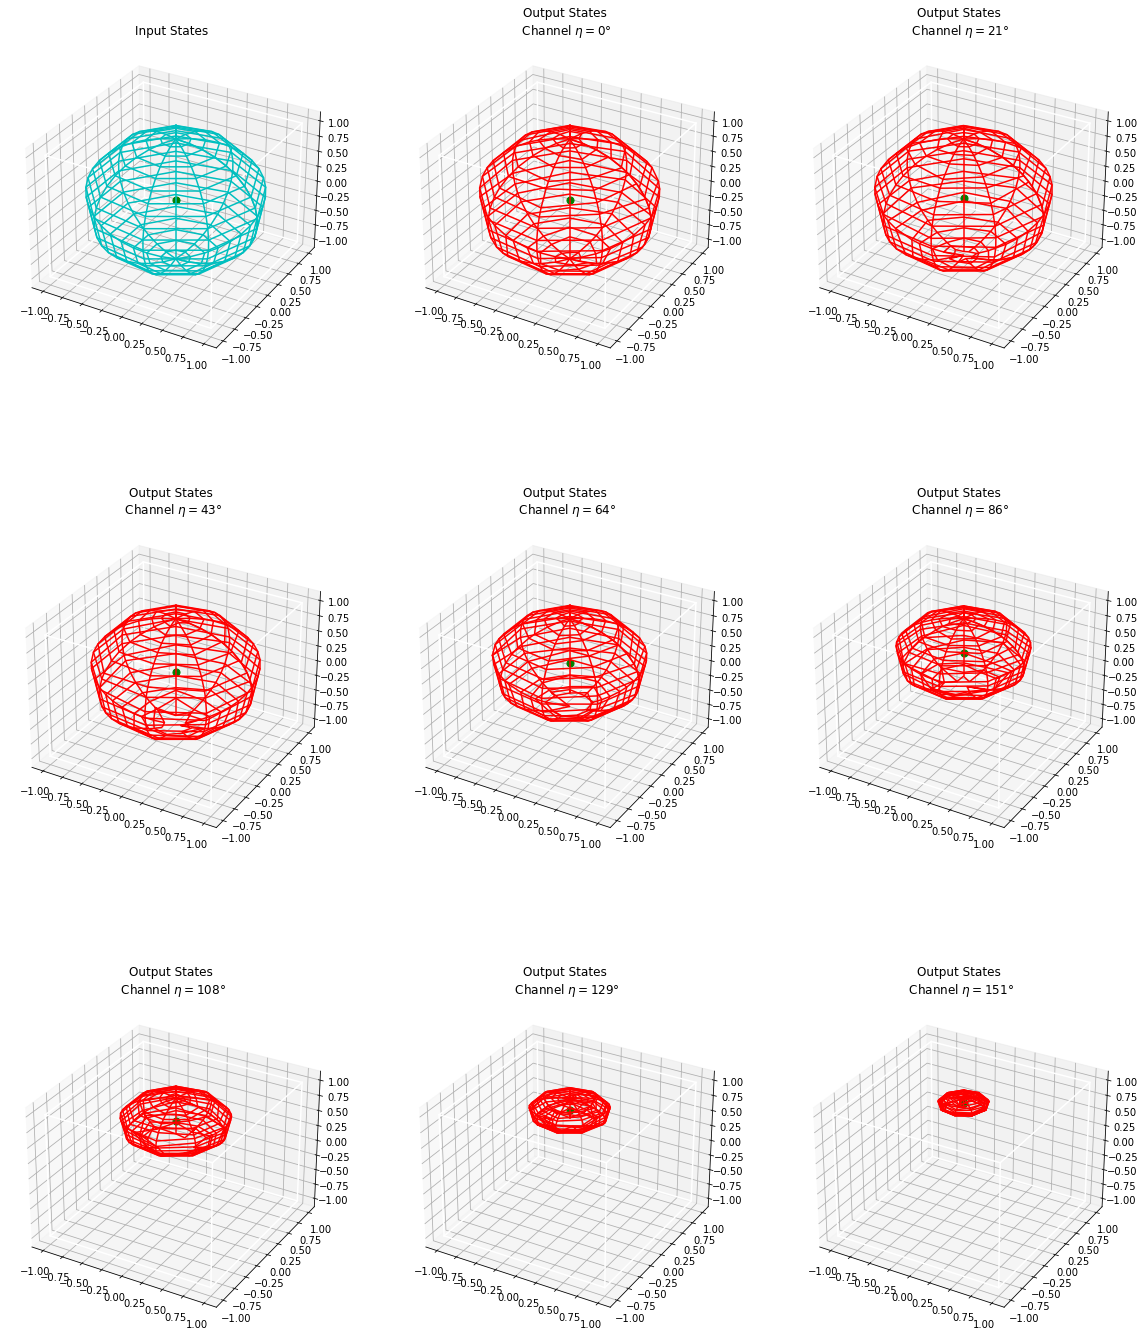

In [5]:
plot_wireframe_blochs(initialStatesReshaped, allChannelsFinalStatesReshaped, angles_eta, rows=3, cols=3)

### Effect of the amplitude damping channel attenuation on the Bloch sphere
#### For all 200 Input States, from 8 channels $\eta=0$ to $\eta=\pi$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

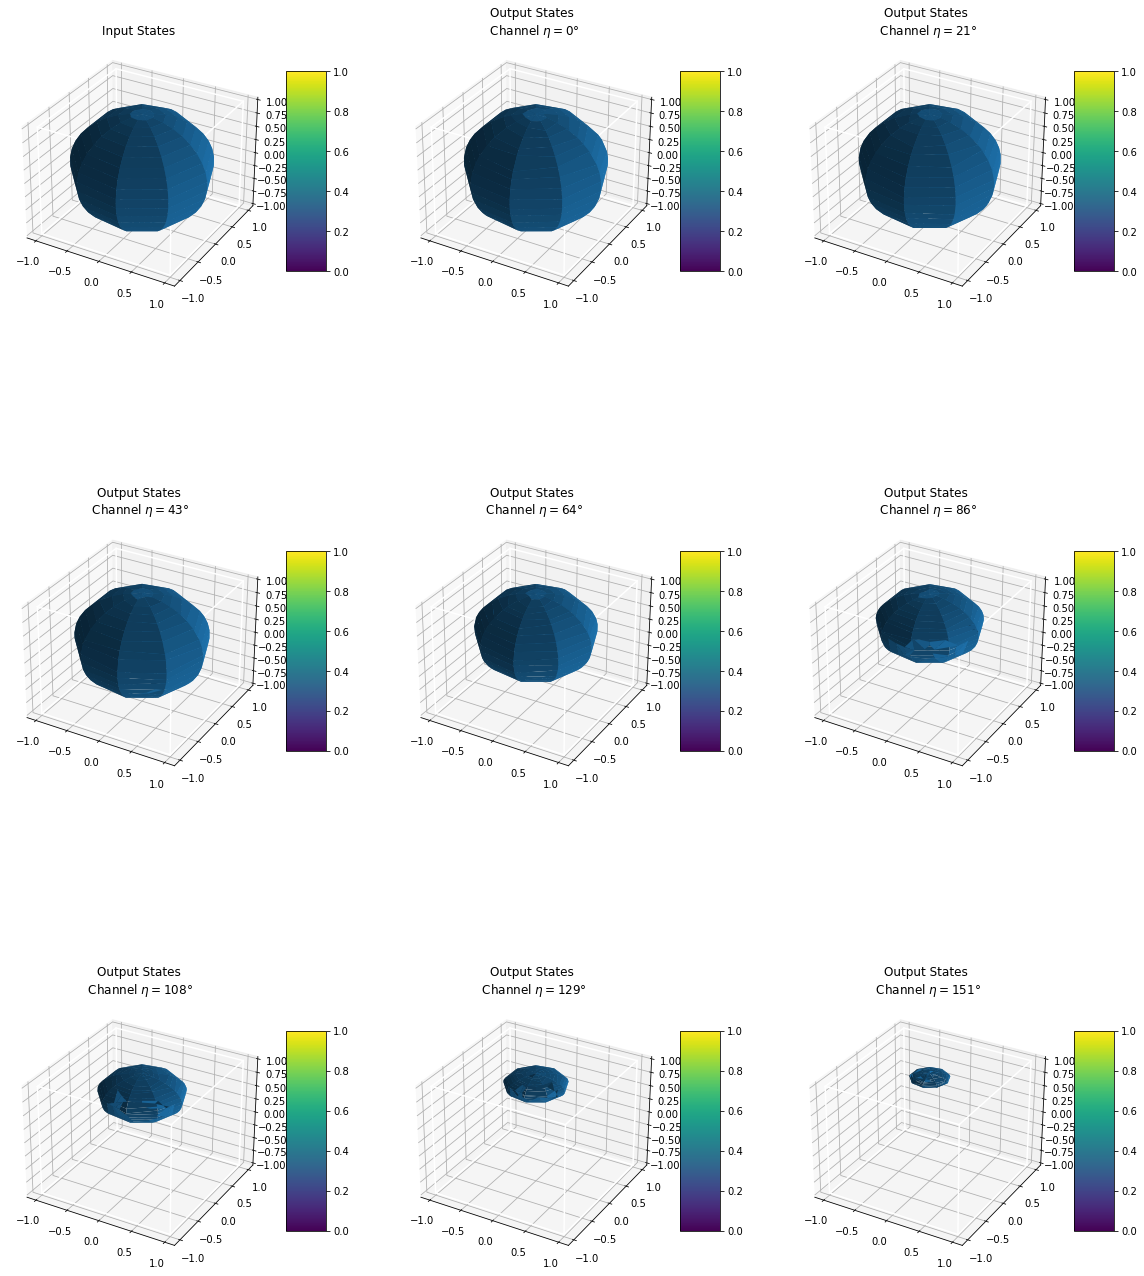

In [6]:
plot_surface_blochs(initialStatesReshaped, allChannelsFinalStatesReshaped, angles_eta, rows=3, cols=3)

### Computing the amplitude damping channel fidelity to Input State $|0\rangle$
#### For all 200 Input States, from 10 channels $\eta=0$ to $\eta=\pi$ and output measurement to $\phi_{out}=0$ and $\theta_{out}=0$

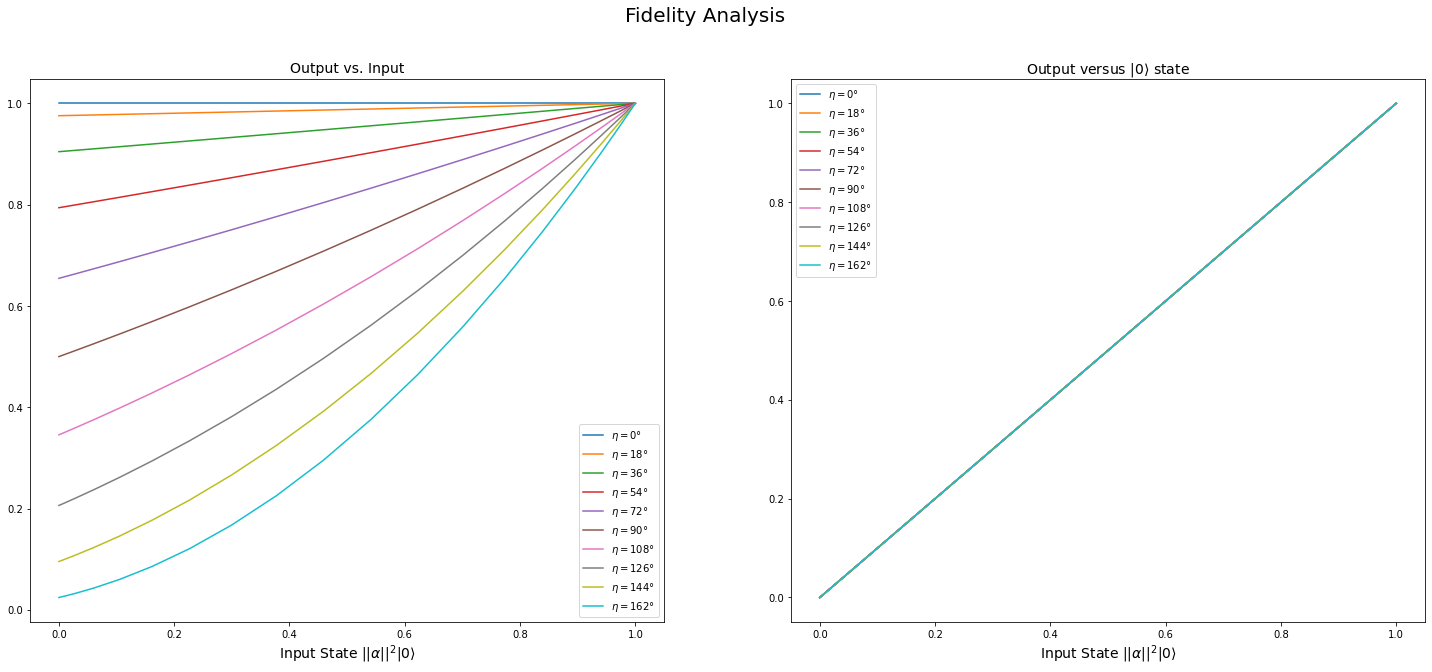

In [7]:
plot_fidelity(angles_eta, pointsTheta=points_theta)

### Computing the amplitude damping channel fidelity to Input State $|0\rangle$
#### For all 200 Input States, from 10 channels $\eta=0$ to $\eta=2\pi$ and output measurement changing from $0$ to $2\pi$ for both $\phi_{out}$ and $\theta_{out}$

### !!!TBD: the following plots will be updated to show a better result.

In [4]:
points_theta = 20  # Points of Theta angle (pi) in Bloch sphere - min 2
#angles_eta = np.arange(0, 2*pi, 2*pi/points_theta) 
angles_eta = [0, pi/4, pi/2, 3*pi/4, pi, 1.25*pi, 1.5*pi, 1.75*pi, 2*pi]
angles = [0, pi/2, pi, 1.5*pi, 2*pi]

for angle_rz in angles:
    for angle_ry in angles:
        # plot_fidelity(angles_eta, pointsTheta=points_theta, rz_angle=angle_rz, ry_angle=angle_ry)
        next

### Running the experiment on a real IBMQ device
First, we launch a 40 input states on a noiseless simulation device, plotting the resuling states on the Bloch Sphere:

![](plot-simulation.png)

Now, doing the same result on a real **IBM Athens** device:

![](ibmq-real.png)

## What's next?

Launch a classical and VQA optimization to find the optimal values for the 6 input values (input state, $\eta$ attenuation channel, and output measurement angles) that maximizes the probability of discriminating the amplitude damping channel.

## References

- \[1\] Nielsen & Chuang. Section 8.3.5